# Análisis de Interacciones en Twitter (Twitter Wars)

Este Jupyter Notebook incluye el análisis de interacciones realizado sobre los hashtags (HT) **#BukeleDictador** y **#EstoyConBukele** que se mantuvieron activos como *Trending Topic*(TT) en la red social Twitter desde de la media noche del sábado 18 de Abril de 2020 hasta el lunes 20 del mismo més durante la mañana.

## Motivación

En el mundo virtual, las redes de sociales se han vuelto la principal fuente de información para muchísimos ciudadanos. Por la forma en que las redes funcionan las denominadas "tendencias" se originan de la viralización de ciertos contenidos que resultan de interés para la población.

Dentro de las redes se conoce como contenido "orgánico" a todo aquel contenido que se populariza a causa de interacciones entre usuarios. Este es un fenómeno emergente en que usuarios comienzan a compartir el contenido. A este mecanismo se le ha acuñado "viralización" ya que asemeja la forma en que los virus se dispersan en una población.

Sin embargo, siempre existe la duda si muchas de estas tendencias se originan de forma orgánica o si existen factores externos que podrían provocar que ciertos temas se viralizen a través de redes sociales. Uno de los mecanismos que se ha venido utilizando en los últimos años es la utilización de redes de *"influenciadores"* sumado a cuentas falsas para asemejar el comportamiento orgánico que tendría un contenido viral.

El presente análisis utiliza estos dos HT para tratar de determinar con ayuda de técnicas de análisis de datos si existen indicios de automatización en la forma en que se viralizaron ambos hashtags de recolección de datos.

## Recolección de Datos

Se utilizó la API estándar de Twitter para extraer los status retornados por la búsqueda de ambos hashtags.

La base de datos extrajo las menciones del Hashtag dentro del contenido del status, como respuestas a otros status o re-tweets que contenían dicho hashtag.

Para el HT **#BukeleDictador** se recolectaron tweets entre el ***Martes 13 de Abril a las 23:00*** y el ***Miércoles 22 de Abril a las 12:00*** hora de El Salvador.

Para el HT **#EstoyConBukele** se recolectaron tweets entre el ***Jueves 16 de Abril a las 03:00*** y el ***Miércoles 22 de Abril a las 12:00*** hora de El Salvador.

La viralización de ambos contenidos ocurrió cerca del sábado 18 a media noche, pero se recolectaron datos antes y después de la activación del HT para poder tener datos adicionales de comparación de la tendencia como referencia.


## Limitaciones de los Datos

Debido a que los datos se recolectaron utilizando la API estándar de Twitter tienen algunas limitaciones en su contenido:

1. No hay garantía de estos sean *todos* los tweets disponibles.
2. El contenido de los tweets está truncado a 150 caracteres.

Un análisis más detallado solo puede ser realizado con acceso Premium a la API de Twitter.

## Pre-procesamiento

Los status recolectados de Twitter son recibidos en formato JSON y contienen los siguientes datos:

* Información general del tweet: Fecha de creación, Texto, Hashtags utilizados y referencias multimedia.
* Información del usuario: Información publica del usuario (Información general disponible en el perfil)
* Si es un Re-tweet: Tweet al cual se hace referencia e información general del mismo.
* Si es una Respuesta: Información del tweet y el usuario al cual se responde.

Los datos enformato JSON fueron transformados en un archivo en formato CSV para su fácil procesamiento con herramientas de análisis de datos y se incluyó la siguiente información:

* **id**: ID único del estado. Generado por Twitter.
* **user_id**: ID único de usuario. Generado por Twitter.
* **status_timestamp**: Hora y fecha de publicación del tweet en formato de entero como *timestamp UNIX* hora de referencia GMT.
* **screen_name_len**: Longitud del nombre de usuario.
* **numbers_in_screen_name**: Total de dígitos en el nombre de usuario.
* **created_timestamp**: Hora y fecha de creación del usuario que publica el status en formato de entero como *timestamp UNIX* hora de referencia GMT.
* **account_age**: Diferencia en segundos entre el *timestamp UNIX GMT* para la fecha *Abril 25 2020 a las 00:00 horas* y el valor contenido en la columna **created_timestamp**.
* **has_desc**: Valor 1 si el usuario tiene una descripción en su cuenta, 0 en caso contrario.
* **desc_len**: Longitud en caracteres de la descripción de la cuenta.
* **favourites_count**: Conteo total de interacciones de "favoritos" en la cuenta.
* **friends_count**: Total de usuarios a los que sigue el usuario particular.
* **statuses_count**: Total de estados publicados por la cuenta desde el registro.
* **text_len**: Tamaño total de la interacción.
* **ht_bd**: Número de veces que utilizó el HT *#BukeleDictador*.
* **ht_ecb**: Número de veces que utilizó el HT *#EstoyConBukele*.
* **rt_count_acc**: Conteo de retweets. Este valor contiene el total de veces que un tweet fué re-twitteado al momento de la extracción.
* **rt_count**: 1 si el estado ha sido retwitteado.
* **rt_status_id**: ID de estado original del RT. Si este estado es el primero el valor es None.
* **rt_status_user**: ID del usuario original del RT. Si este estado es el primero el valor es None.
* **reply_count**: 1 si el estado es una respuesta.
* **reply_status_id**: ID del estado al que este tweet responde. None si no es respuesta. 
* **reply_user_id**: ID del usuario al que este tweet responde. None si no es respuesta.
* **filename**: Nombre del archivo original del cual se procesaron los datos.


## Anonimización

Aunque los Términos de Servicio de Twitter permiten compartir los IDs de estados y de usuarios con fines de análisis. Durante la semana un funcionario de gobierno publicó un website donde se presentaban analíticas que rastreaban a usuarios que habían utilizado el HT *#BukeleDictador*.

La utilización de datos de Twitter para realizar rastreo de usuarios está prohibido según las políticas de uso. Debido a que existe el potencial de que al compartir la data cruda, o incluso los IDs de interacciones se pueda utilizar estos datos con fines de rastreo se ha anonimizado el conjunto de datos para que pueda ser utilizado en análisis reduciendo el riesgo de rastreo de usuarios.

Las transformaciones aplicadas al conjunto de datos son los siguientes:
    
* **id**: El ID original del estado de Twitter ha sido reemplazado por la columna **rnd_id**. Este es un ID aleatorio único generado para cada estado. A diferencia del ID de Twitter, este no es secuencial.
* **user_id**: El ID original de usuario de Twitter ha sido reemplazado por la columna **rnd_user_id**. Este es un ID aleatorio único generado para cada usuario. A diferencia del ID de Twitter, este ID no es secuencial.
* **status_timestamp**: Al estado original se le ha agregado **al azar** un incremento o retardo de +/-15 minutos. De tal manera que no es posible obtener la hora de publicación exacta.
* **created_timestamp**: A la fecha de creación original se le ha agregado **al azar** un incremento o retardo de +/- 48h. De tal manera que no es posible obtener la fecha de registro exacto del usuario.
* Se agregó la columna **seq_id** que indica si el tweet fue publicado antes o despues que otro tweet en la secuencia.

Para las columnas **rt_status_id**, **rt_status_user*, **reply_status_id** y **reply_user_id** se reemplazó el ID original por el correspondiente **rnd_id** o **rnd_user_id**. Así que debería ser posible hacer análisis de red con el conjunto de datos anonimizado.

### Limitantes en el mecanismo de anonimización

Un atacante con recursos podría utilizar la meta-data para buscar y clasificar los tweets que coincidan con la descripción genérica de los tweets anonimizados. Sin embargo el mecanismo de anonimización reduce el nivel de certeza para el atacante.

La API estándar de Twitter solo permite realizar búsquedas de estatus que no tengan más de 1 semana de haber sido publicados. Esta base de datos se publica exáctamente 1 semana después del evento analizado de tal manera que usuarios con acceso estándar a la API no podrán utilizar el mecanismo de búsquedas para identificar los tweets originales.

Siempre es posible que usuarios con acceso premium a la API puedan realizar esta clase de búsquedas. Pero tomando en consideración que existen condiciones de servicio más estrictas de uso para usuarios de la API Premium y bajo el riesgo de terminación de servicio por incumplimiento de los Términos de Uso. Esperamos que este mecanismo de anonimización sea disuasivo suficiente para la gran mayoría de atacantes.

El mecanismo de anonimización seleccionado también agrega un poco de ruido a los datos. Sin embargo al ser un ruido agregado al azar se espera que los valores medios se mantengan constantes y estos puedan seguir siendo utilizados para análisis.

## Datos

Los datos para replicar este análisis pueden ser descargados de la siguiente dirección:

[https://portal.sivardata.com/dataset/twitterwars](https://portal.sivardata.com/dataset/twitterwars)

## Copyrights

**Código Fuente**

*Copyright 2020 Mario Gómez @ Hackerspace San Salvador*

Usted puede copiar, modificar y redistribuir el código fuente incluído con este análisis bajo las condiciones de la licencia [GNU/GPL v3.0](https://www.gnu.org/licenses/gpl-3.0.en.html) o (a su elección) una versión posterior. Deberá incluír esta noticia de Copyright. El código fuente se ofrece sin ningúna garantía, nisiquiera con la garantía implicita de que este código cumple con su funcionamiento.

**Textos y gráficos**

*Copyright 2020 Mario Gómez @ Hackerspace San Salvador*

Usted puede copiar, modificar y redistribuir los textos y gráficos incluídos en este análisis bajo la licencia Creative Commons - Attribution-Share-Alike 4.0. Puede encontrar los términos de licencia en el [sitio web de Creative Commons](https://creativecommons.org/licenses/by-sa/4.0/).

**Datos**

En cumplimiento a los Términos de Uso de Twitter se comparten datos de forma completamente anonimizada. Esta licencia solo es aplicable a los datos procesados y anonimizados compartidos junto a este análisis. Si desea acceso a los datos crudos por favor solicitarlos a [mario.gomez@teubi.co](mailto:mario.gomez@teubi.co).

*Copyright 2020 Mario Gómez @ Hackerspace San Salvador*

La base de datos anonimizada de **Twitter Wars** se hace disponible a través de la [Open Database Licence](http://opendatacommons.org/licenses/odbl/1.0/). Todos los derechos en los contenidos individuales de esta base de datos estan licenciados bajo la [Database Contents License](http://opendatacommons.org/licenses/dbcl/1.0/).


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from datetime import timezone
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.cm as cm
%matplotlib inline

Cargamos el archivo de datos

In [2]:
twitter_wars = pd.read_csv('./data/tweets_consolidado_anonimizado.csv')

Ajustamos algunas columnas para facilitar el analisis.

In [3]:
mapping = {'BukeleDictador.json':1,'EstoyConBukele.json':2}
twitter_wars['filename_class'] =  [mapping[item] for item in twitter_wars['filename']]
twitter_wars['age_days'] = twitter_wars['account_age']/86400
twitter_wars['status_datetime'] = pd.to_datetime(twitter_wars['status_timestamp']-21600, unit='s',utc=True)
print(twitter_wars.columns.values)

['id' 'rnd_id' 'rnd_user_id' 'status_timestamp' 'screen_name_len'
 'numbers_in_screen_name' 'created_timestamp' 'account_age' 'has_desc'
 'desc_len' 'favourites_count' 'followers_count' 'friends_count'
 'statuses_count' 'text_len' 'ht_bd' 'ht_ecb' 'rt_count_acc' 'rt_count'
 'rt_status_id' 'rt_status_user' 'reply_count' 'reply_status_id'
 'reply_user_id' 'filename' 'seq_id' 'filename_class' 'age_days'
 'status_datetime']


Verificamos la carga del archivo de datos

In [4]:
twitter_wars.head()

id    rnd_id  rnd_user_id  status_timestamp  screen_name_len  \
0  -1  59672687     81742008      1.586843e+09               15   
1  -1  41570087     38092977      1.586843e+09               14   
2  -1  36746658     22662134      1.586851e+09               12   
3  -1  10200624     43560843      1.586858e+09                9   
4  -1  31983523     24070570      1.586858e+09               13   

   numbers_in_screen_name  created_timestamp  account_age  has_desc  desc_len  \
0                       0       1.478527e+09  109304695.0         1       158   
1                       0       1.458259e+09  129679935.0         1       157   
2                       0       1.353466e+09  234447711.0         1       138   
3                       1       1.585205e+09    2587974.0         1        24   
4                       0       1.440104e+09  147596670.0         1       156   

   ...  rt_status_id  rt_status_user  reply_count  reply_status_id  \
0  ...          None            None            0             None   
1  ...      59672687        81742008            0             None   
2  ...      59672687        81742008            0             None   
3  ...      59672687        81742008            0             None   
4  ...      59672687        81742008            0             None   

   reply_user_id             filename  seq_id  filename_class     age_days  \
0           None  BukeleDictador.json       0               1  1265.100637   
1           None  BukeleDictador.json       1               1  1500.925174   
2           None  BukeleDictador.json       2               1  2713.515174   
3           None  BukeleDictador.json       3               1    29.953403   
4           None  BukeleDictador.json       4               1  1708.294792   

            status_datetime  
0 2020-04-13 23:43:01+00:00  
1 2020-04-13 23:43:30+00:00  
2 2020-04-14 01:59:13+00:00  
3 2020-04-14 03:51:13+00:00  
4 2020-04-14 03:45:09+00:00  

[5 rows x 29 columns]

Exploramos estadísticos descriptiivos de algunas variables

In [5]:
twitter_wars['id'].count()

124520

In [6]:
twitter_wars['created_timestamp'].min()

1171482875.0

In [7]:
twitter_wars['created_timestamp'].max()

1587705627.0

In [8]:
twitter_wars.groupby('filename')['rt_count'].sum()

filename
BukeleDictador.json    44910
EstoyConBukele.json    48348
Name: rt_count, dtype: int64

In [9]:
twitter_wars.groupby('filename')['rt_count_acc'].sum()

filename
BukeleDictador.json     4218835
EstoyConBukele.json    17136504
Name: rt_count_acc, dtype: int64

In [10]:
twitter_wars.groupby('filename')['reply_count'].sum()

filename
BukeleDictador.json     5983
EstoyConBukele.json    16465
Name: reply_count, dtype: int64

In [11]:
twitter_wars.groupby('filename')['rt_count'].mean()

filename
BukeleDictador.json    0.831605
EstoyConBukele.json    0.685632
Name: rt_count, dtype: float64

In [12]:
twitter_wars.groupby('filename')['reply_count'].sum()

filename
BukeleDictador.json     5983
EstoyConBukele.json    16465
Name: reply_count, dtype: int64

El siguiente comando muestra la distribución de cuentas por longevidad. (0 = Cuentas recientes)

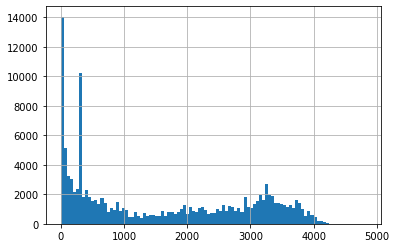

In [13]:
twitter_wars['age_days'].hist(bins=100)

La siguiente gráfica muestra el comportamiento de tweets por hora

Text(0, 0.5, 'Number of tweets')

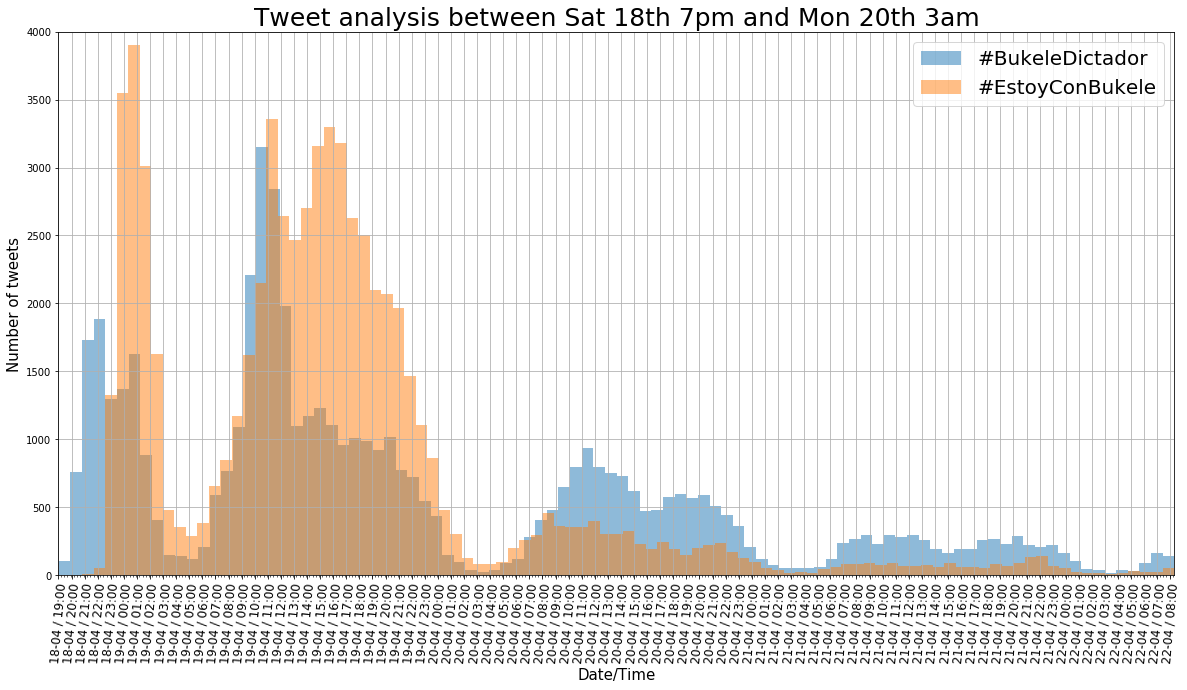

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15)) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m / %H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1)) 
ax.set(
    xlim=(
        datetime.fromtimestamp(1587258000-21600,tz=timezone.utc),
        datetime.fromtimestamp(1587565108-21600,tz=timezone.utc)
    ),
    ylim=(
        0,
        4000
    )
)
twitter_wars[
    (twitter_wars.status_timestamp >= (1587258000)) &
    (twitter_wars.status_timestamp <= (1587565108))
].groupby('filename')['status_datetime'].hist(bins=96,alpha=0.5,ax=ax)
plt.xticks(rotation=85,fontsize=12)
plt.legend(['#BukeleDictador','#EstoyConBukele'],fontsize=20)
plt.title("Tweet analysis between Sat 18th 7pm and Mon 20th 3am".format(0,0+15), fontsize=25)
plt.yscale('linear')
plt.xlabel('Date/Time',fontsize=15)
plt.ylabel('Number of tweets',fontsize=15)

La siguiente gráfica muestra el comportamiento de tweets por longevidad de cuenta

Text(0, 0.5, 'Number of tweets')

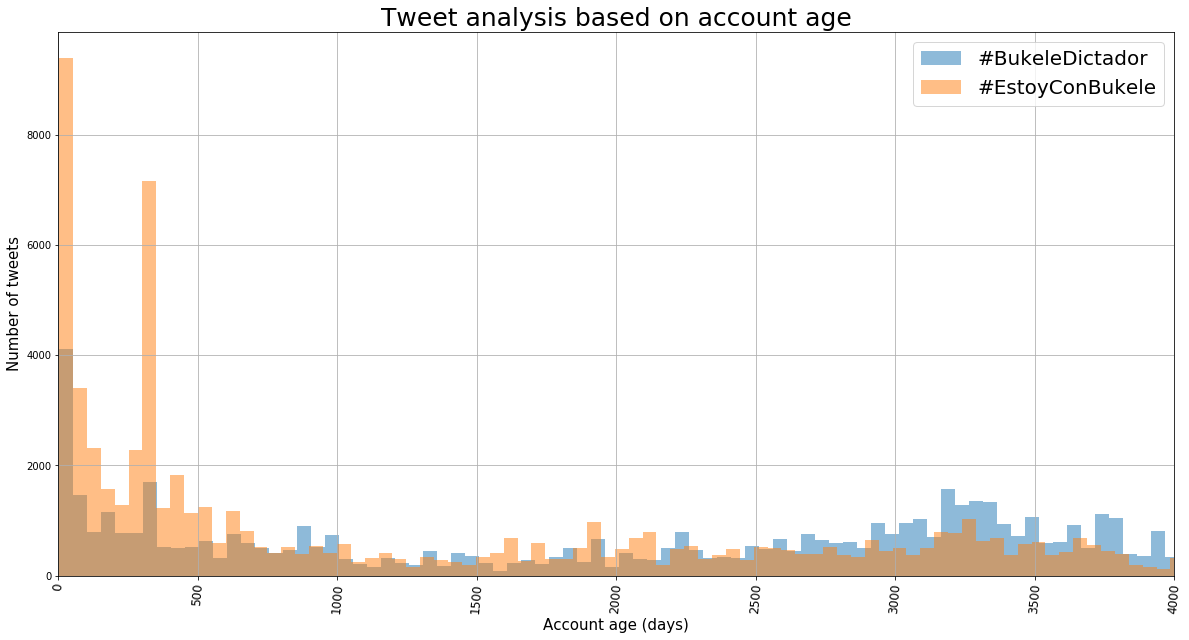

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
#ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15)) 
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m / %H:%M'))
#ax.xaxis.set_major_locator(mdates.HourLocator(interval=1)) 
ax.set(
    xlim=(0,4000)
)
twitter_wars[
    (twitter_wars.status_timestamp >= (1587258000)) &
    (twitter_wars.status_timestamp <= (1587565108))
].groupby('filename')['age_days'].hist(bins=96,alpha=0.5,ax=ax)
plt.xticks(rotation=85,fontsize=12)
plt.legend(['#BukeleDictador','#EstoyConBukele'],fontsize=20)
plt.title("Tweet analysis based on account age".format(0,0+15), fontsize=25)
plt.yscale('linear')
plt.xlabel('Account age (days)',fontsize=15)
plt.ylabel("Number of tweets",fontsize=15)

Construimos nuevas columnas para tener más variables de análisis

In [16]:
# Density columns
twitter_wars['favourites_count_day'] = twitter_wars['favourites_count']/twitter_wars['age_days']
twitter_wars['followers_count_day'] = twitter_wars['followers_count']/twitter_wars['age_days']
twitter_wars['friends_count_day'] = twitter_wars['friends_count']/twitter_wars['age_days']
twitter_wars['statuses_count_day'] = twitter_wars['statuses_count']/twitter_wars['age_days']
twitter_wars['time_of_activity_day'] = twitter_wars['status_timestamp']%86400
# twitter_wars['created_during_week'] = twitter_wars['created_timestamp']//1296000
twitter_wars['numeric_screen_name'] = twitter_wars['numbers_in_screen_name']/twitter_wars['screen_name_len']
twitter_wars['lt_15_days'] = (twitter_wars['age_days'] <= 15).astype(int)
twitter_wars['st_wave'] = ((twitter_wars['age_days'] >= 300) & (twitter_wars['age_days'] <= 350)).astype(int)

twitter_data = twitter_wars.filter([
    'desc_len', # Longitud del texto del perfil
    'favourites_count_day', # Numero favoritos por día
    'followers_count_day', # Numero de seguidores por día
    'friends_count_day', # Numero de amigos por día
    'statuses_count_day', # Numero de estados por día
    'text_len', # Longitud de la interacción (Tweet)
    'rt_count_acc', # Número de RT acumulado (# RT de RT)
    'rt_count', # Tweet es RT (0 no, 1 sí)
    'reply_count', # Tweet es Respuesta (0 no, 1 sí)
    'ht_bd',
    'ht_ecb',
    'created_timestamp',
    'time_of_activity_day',
    'numeric_screen_name',
    'age_days',
    'screen_name_len',
    'status_timestamp',
    'numbers_in_screen_name',
    'lt_15_days',
    'st_wave'
])

# Normalizamos valores
for col in twitter_data:
    col_zscore = col + '_zs'
    twitter_data[col_zscore] = (twitter_data[col] - twitter_data[col].mean())/twitter_data[col].std(ddof=0)

twitter_data = twitter_data.filter([
    'screen_name_len_zs', # Longitud del @nickname
    'numbers_in_screen_name_zs', # Numeritos en la cuenta 
    'rt_count_acc_zs', # Número de RT acumulado (# RT de RT)
    'time_of_activity_day_zs', # Hora en que ocurre la activación asumiendo activación simultánea
    'lt_15_days_zs', # Activado en los últimos 15 días
    'st_wave_zs', # Activado en la primera ola de registros hace 320 días
])

# El objetivo de la exploración es encontrar una serie de atributos que
# Igualen el comportamiento de los dos HT y que diferencien un comportamiento
# Sobre el otro.

Text(0, 0.5, 'Largo del Nickname')

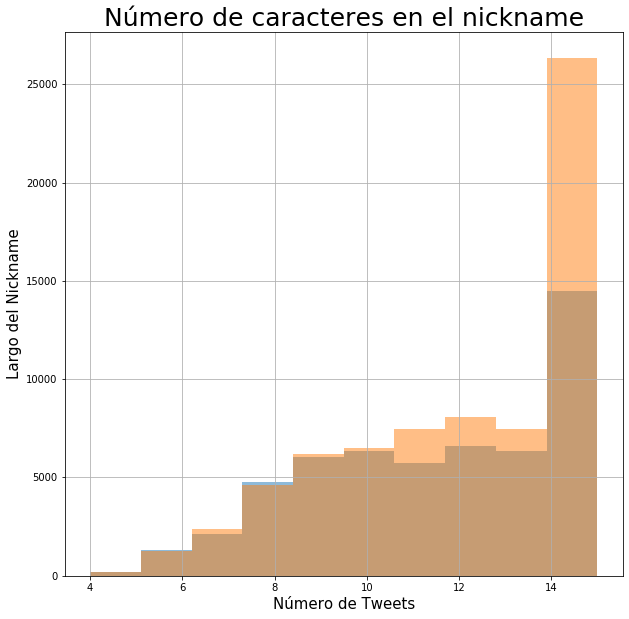

In [17]:
twitter_wars.groupby('filename_class')['screen_name_len'].hist(alpha=0.5,figsize=(10,10))
plt.title("Número de caracteres en el nickname",fontsize=25)
plt.xlabel('Número de Tweets',fontsize=15)
plt.ylabel('Largo del Nickname',fontsize=15)

Text(0, 0.5, 'Cantida de Números')

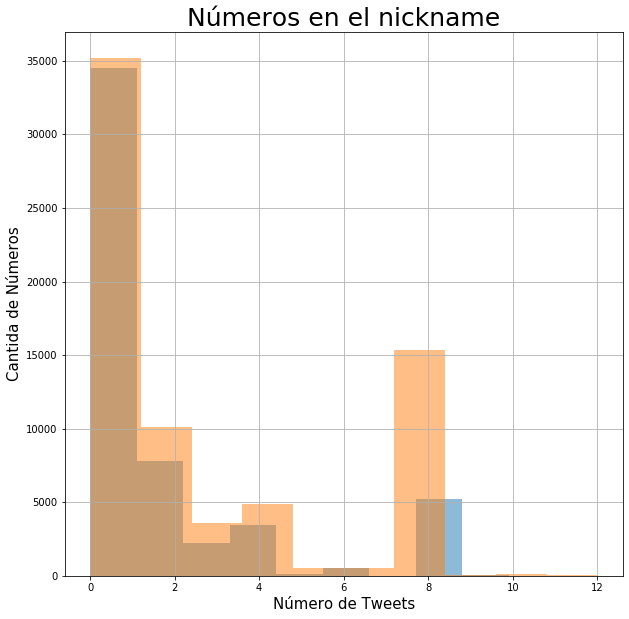

In [18]:
twitter_wars.groupby('filename_class')['numbers_in_screen_name'].hist(alpha=0.5,figsize=(10,10))
plt.title("Números en el nickname",fontsize=25)
plt.xlabel('Número de Tweets',fontsize=15)
plt.ylabel('Cantida de Números',fontsize=15)

Text(0, 0.5, 'Cantidad de Retweets')

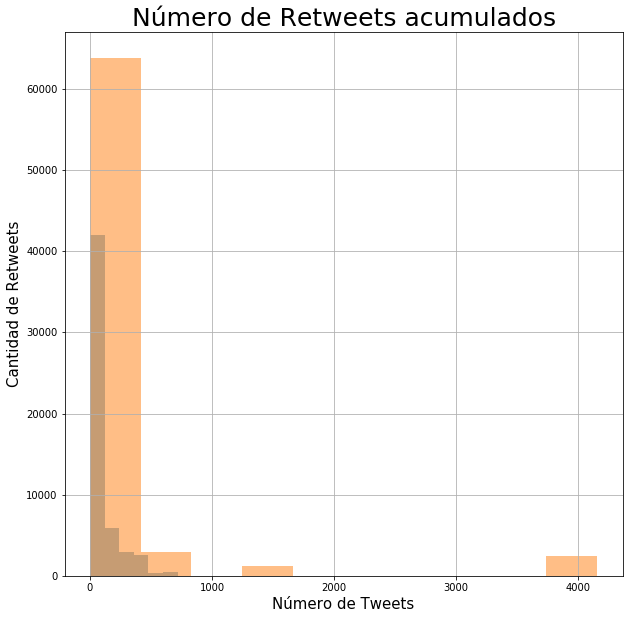

In [19]:
twitter_wars.groupby('filename_class')['rt_count_acc'].hist(alpha=0.5,figsize=(10,10))
plt.title("Número de Retweets acumulados",fontsize=25)
plt.xlabel('Número de Tweets',fontsize=15)
plt.ylabel('Cantidad de Retweets',fontsize=15)

Text(0, 0.5, 'Segundo de activación durante el día')

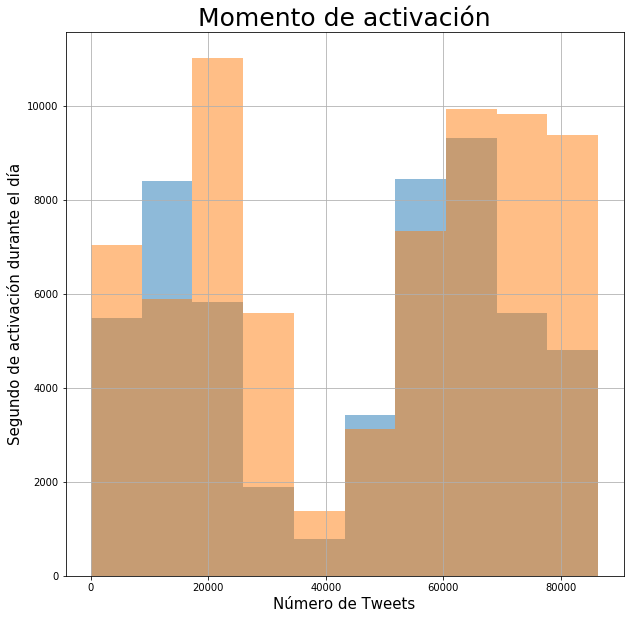

In [20]:
twitter_wars.groupby('filename_class')['time_of_activity_day'].hist(alpha=0.5,figsize=(10,10))
plt.title("Momento de activación",fontsize=25)
plt.xlabel('Número de Tweets',fontsize=15)
plt.ylabel('Segundo de activación durante el día',fontsize=15)

Text(0, 0.5, 'Antiguedad de la cuenta')

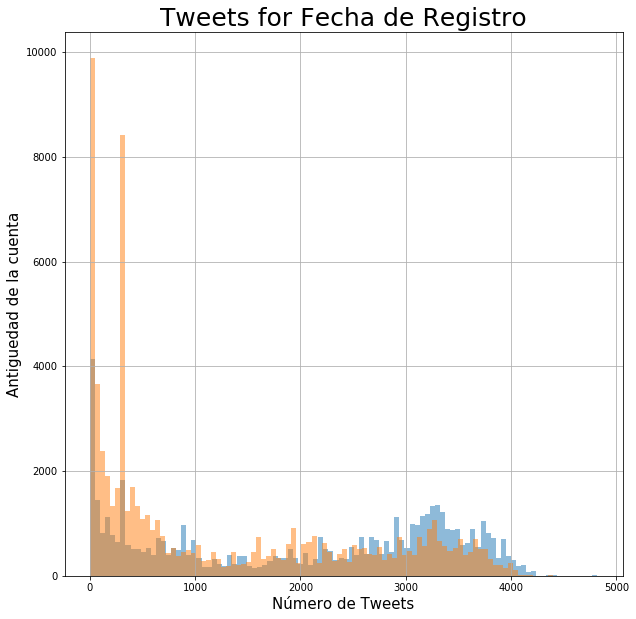

In [21]:
twitter_wars.groupby('filename_class')['age_days'].hist(alpha=0.5,bins=100,figsize=(10,10))
plt.title("Tweets for Fecha de Registro",fontsize=25)
plt.xlabel('Número de Tweets',fontsize=15)
plt.ylabel('Antiguedad de la cuenta',fontsize=15)

Generamos la agrupación por conglomerados. Se usan únicamente 2 porque al agregar más conglomerados se generan grupos muy pequeños que no modifican las tendencias.

In [22]:
kmeans = KMeans(n_clusters=2).fit(twitter_data)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.77802477  1.40180475  0.18657904  0.06383913  0.24158898  0.86020769]
 [-0.2475582  -0.44603755 -0.05936722 -0.02031285 -0.07687073 -0.27370783]]


Asignamos las etiquetas de cluster para poder evaluar los conglomerados

In [23]:
twitter_wars['labels'] = kmeans.labels_

Contamos el número de interacciones bajo la nueva etiqueta.

In [24]:
twitter_wars.groupby(['filename','labels'])['id'].count()

filename             labels
BukeleDictador.json  0          7669
                     1         46335
EstoyConBukele.json  0         22374
                     1         48142
Name: id, dtype: int64

In [25]:
twitter_wars[
    (twitter_wars.status_timestamp >= (1587258000)) &
    (twitter_wars.status_timestamp <= (1587565108)) &
    (twitter_wars.labels == 0)
].groupby('filename')['id'].count()

filename
BukeleDictador.json     7495
EstoyConBukele.json    20784
Name: id, dtype: int64

Text(0, 0.5, 'Number of tweets')

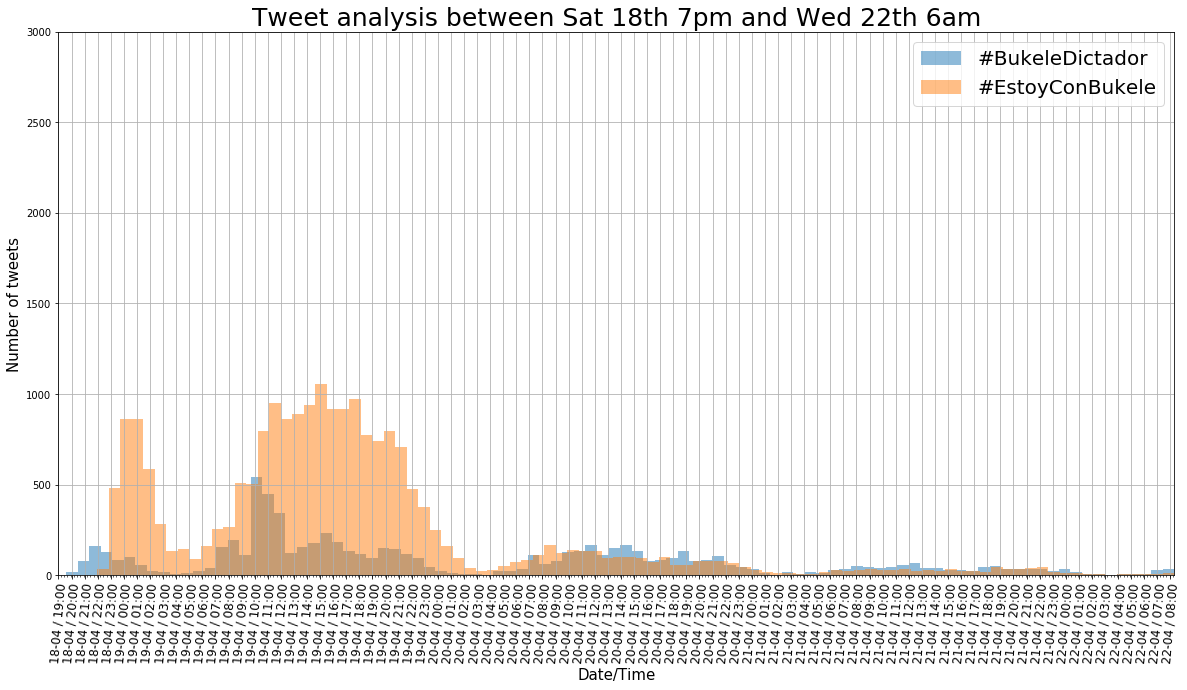

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15)) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m / %H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1)) 
ax.set(
    xlim=(
        datetime.fromtimestamp(1587258000-21600,tz=timezone.utc),
        datetime.fromtimestamp(1587565108-21600,tz=timezone.utc)
    ),
    ylim=(
        0,
        3000
    )
)
twitter_wars[
    (twitter_wars.status_timestamp >= (1587258000)) &
    (twitter_wars.status_timestamp <= (1587565108)) &
    (twitter_wars.labels == 0)
].groupby('filename')['status_datetime'].hist(bins=96,alpha=0.5,ax=ax)
plt.xticks(rotation=85,fontsize=12)
plt.legend(['#BukeleDictador','#EstoyConBukele'],fontsize=20)
plt.title("Tweet analysis between Sat 18th 7pm and Wed 22th 6am".format(0,0+15), fontsize=25)
plt.yscale('linear')
plt.xlabel('Date/Time',fontsize=15)
plt.ylabel('Number of tweets',fontsize=15)

Text(0, 0.5, 'Number of tweets')

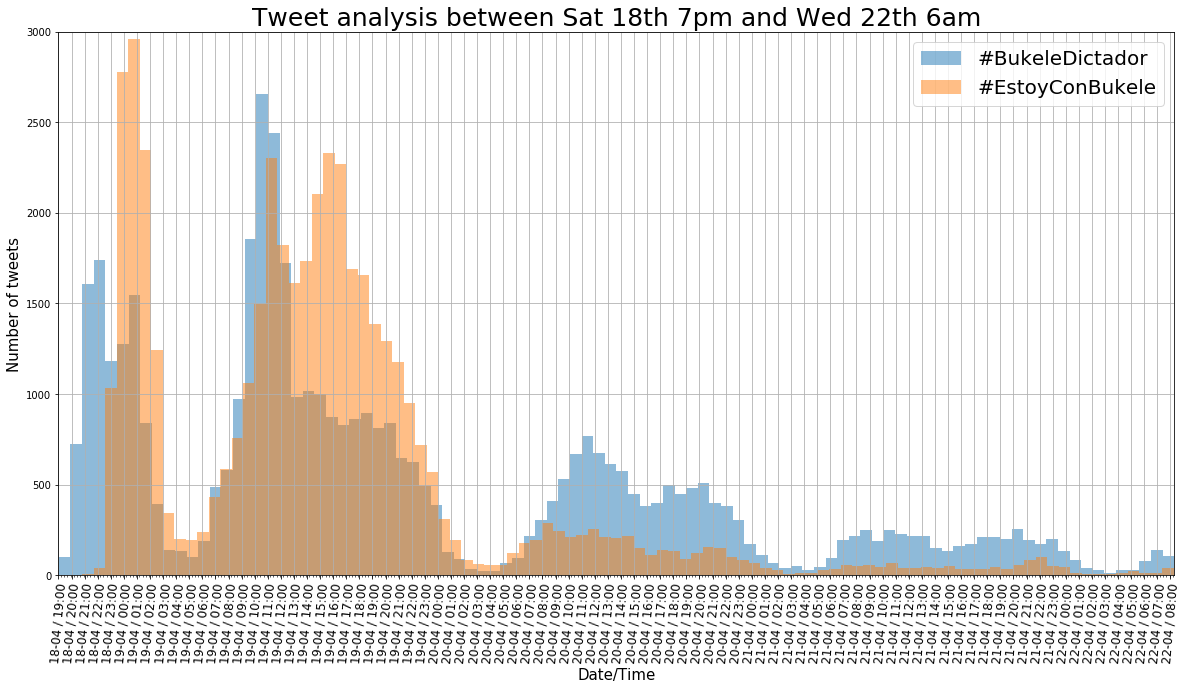

In [27]:
fig, ax = plt.subplots(figsize=(20,10))
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15)) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m / %H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1)) 
ax.set(
    xlim=(
        datetime.fromtimestamp(1587258000-21600,tz=timezone.utc),
        datetime.fromtimestamp(1587565108-21600,tz=timezone.utc)
    ),
    ylim=(
        0,
        3000
    )
)
twitter_wars[
    (twitter_wars.status_timestamp >= (1587258000)) &
    (twitter_wars.status_timestamp <= (1587565108)) &
    (twitter_wars.labels == 1)
].groupby('filename')['status_datetime'].hist(bins=96,alpha=0.5,ax=ax)
plt.xticks(rotation=85,fontsize=12)
plt.legend(['#BukeleDictador','#EstoyConBukele'],fontsize=20)
plt.title("Tweet analysis between Sat 18th 7pm and Wed 22th 6am".format(0,0+15), fontsize=25)
plt.yscale('linear')
plt.xlabel('Date/Time',fontsize=15)
plt.ylabel('Number of tweets',fontsize=15)

Text(0, 0.5, 'Number of tweets (log scale)')

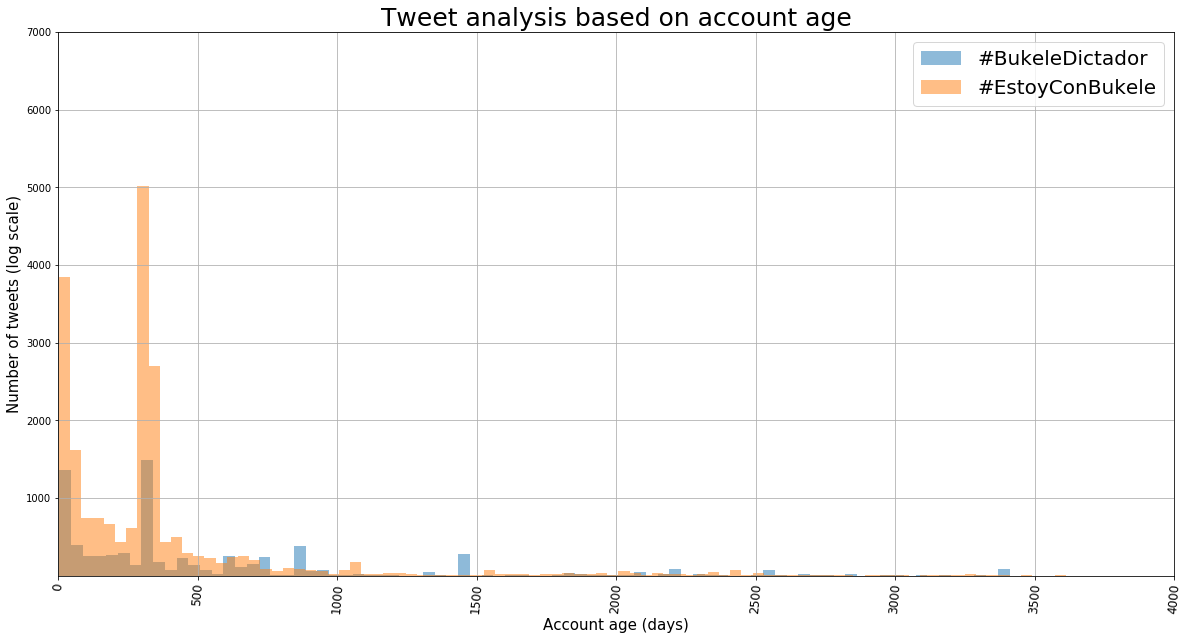

In [28]:
fig, ax = plt.subplots(figsize=(20,10))
#ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15)) 
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m / %H:%M'))
#ax.xaxis.set_major_locator(mdates.HourLocator(interval=1)) 
ax.set(
    xlim=(0,4000), ylim=(1,7000)
)
twitter_wars[
    (twitter_wars.status_timestamp >= (1587258000)) &
    (twitter_wars.status_timestamp <= (1587565108)) &
    (twitter_wars.labels == 0)
].groupby('filename')['age_days'].hist(bins=96,alpha=0.5,ax=ax)
plt.xticks(rotation=85,fontsize=12)
plt.legend(['#BukeleDictador','#EstoyConBukele'],fontsize=20)
plt.title("Tweet analysis based on account age".format(0,0+15), fontsize=25)
plt.yscale('linear')
plt.xlabel('Account age (days)',fontsize=15)
plt.ylabel("Number of tweets (log scale)",fontsize=15)

Text(0, 0.5, 'Number of tweets (log scale)')

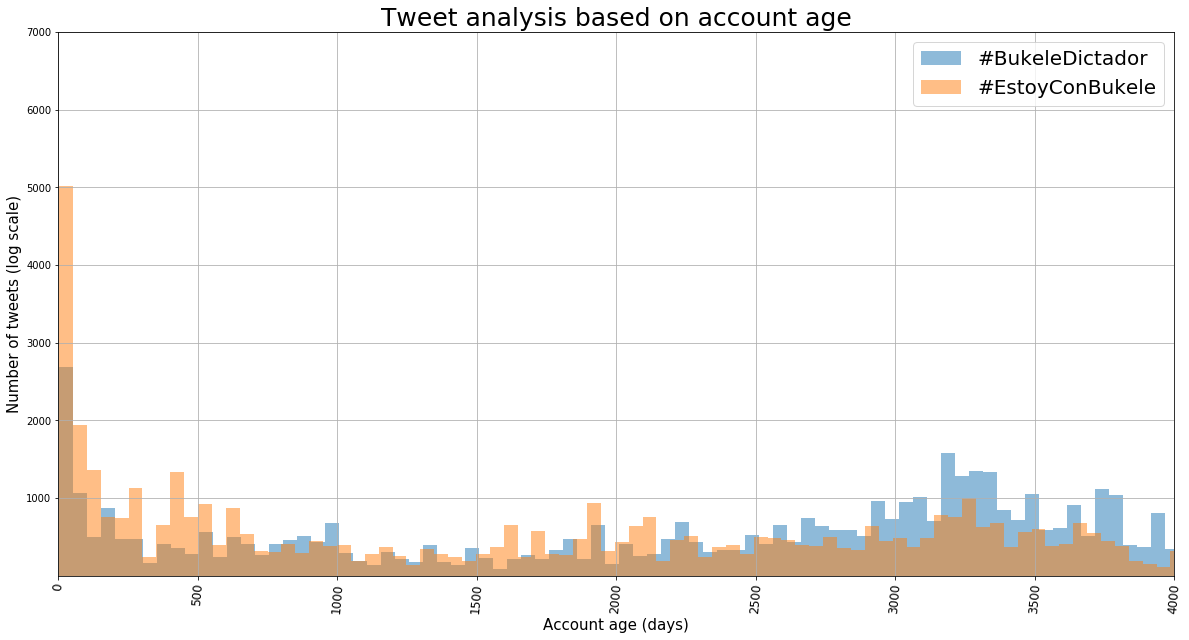

In [29]:
fig, ax = plt.subplots(figsize=(20,10))
#ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15)) 
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m / %H:%M'))
#ax.xaxis.set_major_locator(mdates.HourLocator(interval=1)) 
ax.set(
    xlim=(0,4000), ylim=(1,7000)
)
twitter_wars[
    (twitter_wars.status_timestamp >= (1587258000)) &
    (twitter_wars.status_timestamp <= (1587565108)) &
    (twitter_wars.labels == 1)
].groupby('filename')['age_days'].hist(bins=96,alpha=0.5,ax=ax)
plt.xticks(rotation=85,fontsize=12)
plt.legend(['#BukeleDictador','#EstoyConBukele'],fontsize=20)
plt.title("Tweet analysis based on account age".format(0,0+15), fontsize=25)
plt.yscale('linear')
plt.xlabel('Account age (days)',fontsize=15)
plt.ylabel("Number of tweets (log scale)",fontsize=15)

Text(0, 0.5, 'Longevidad de cuenta')

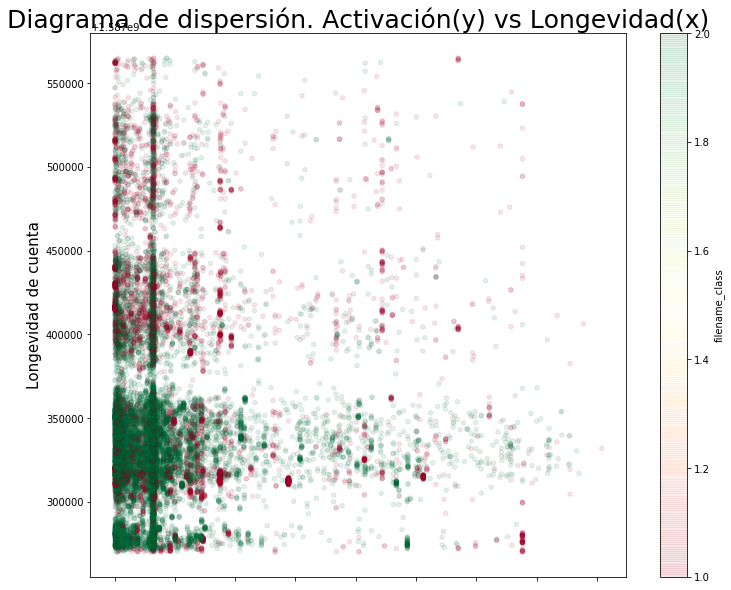

In [30]:
twitter_wars[
    (twitter_wars.status_timestamp >= (1587270000)) &
    (twitter_wars.status_timestamp <= (1587565108)) &
    (twitter_wars.labels == 0)
].plot.scatter(x='age_days',y='status_timestamp',c='filename_class',colormap=cm.RdYlGn, alpha=0.1,figsize=(12,10))

plt.title("Diagrama de dispersión. Activación(y) vs Longevidad(x)", fontsize=25)
plt.xlabel('Activación (Unix Timestamp)',fontsize=15)
plt.ylabel("Longevidad de cuenta",fontsize=15)

Text(0, 0.5, 'Activación (Unix Timestamp)')

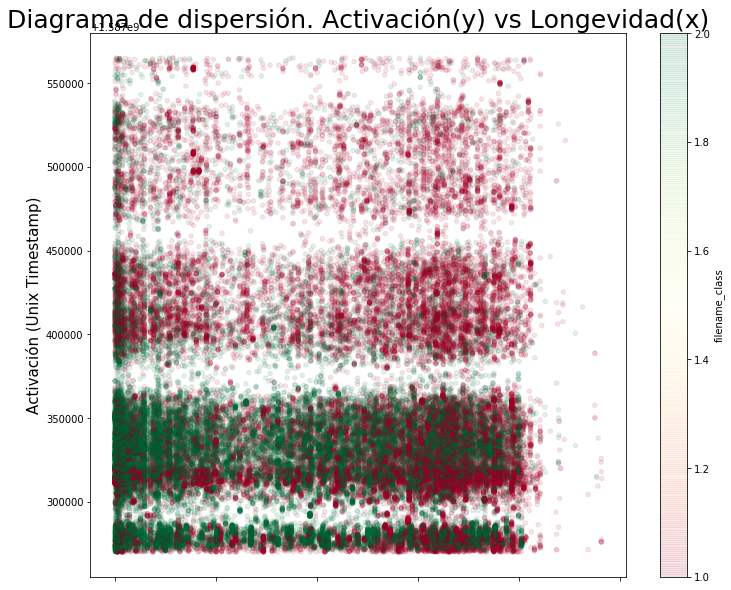

In [31]:
twitter_wars[
    (twitter_wars.status_timestamp >= (1587270000)) &
    (twitter_wars.status_timestamp <= (1587565108)) &
    (twitter_wars.labels == 1)
].plot.scatter(x='age_days',y='status_timestamp',c='filename_class',colormap=cm.RdYlGn, alpha=0.1,figsize=(12,10))
plt.title("Diagrama de dispersión. Activación(y) vs Longevidad(x)", fontsize=25)
plt.xlabel('Longevidad',fontsize=15)
plt.ylabel("Activación (Unix Timestamp)",fontsize=15)

In [32]:
twitter_wars.groupby(['filename','labels'])['numbers_in_screen_name'].mean()

filename             labels
BukeleDictador.json  0         6.484939
                     1         0.804446
EstoyConBukele.json  0         6.262894
                     1         1.043808
Name: numbers_in_screen_name, dtype: float64

labels
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: numbers_in_screen_name, dtype: object

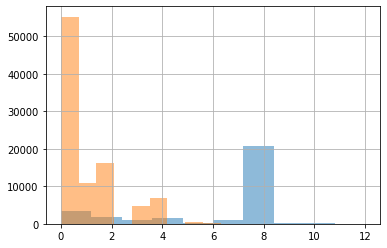

In [33]:
twitter_wars.groupby(['labels'])['numbers_in_screen_name'].hist(alpha=0.5)

In [34]:
twitter_wars.groupby(['filename','labels'])['text_len'].mean()

filename             labels
BukeleDictador.json  0         115.264832
                     1         114.374900
EstoyConBukele.json  0         100.494234
                     1         101.809314
Name: text_len, dtype: float64